### 第13章の章末演習問題
※ ここではGoogle Colaraboratoryでの実行を想定しています。

※ Google Colaraboratoryでbashコマンドを実行するには、命令の前に!をつけます。

## [1] 分類モデルのオーギュメンテーションを、本章と同様に個別のモデルとして実装してください

この問題では12章の分類モデルを使用します（p2ch13_exercise）。

### （a）実装では何らかを妥協しスキップする必要がありましたか。

CPUで行っていたオーギュメンテーションをスキップする必要があります

### （b）訓練速度はどう変わりましたか。

今回の分類モデルは、比較的シンプルかつ前処理もそこまで複雑ではないので、GPUで前処理を行っても訓練速度はほとんど変わりません。

In [1]:
# p2ch13-exerciseのファイルを使用します
from p2ch13_exercise.training import LunaTrainingApp

app = LunaTrainingApp([])

2021-01-17 08:43:58,402 INFO     pid:22963 p2ch13_exercise.training:148:initModel Using CUDA; 1 devices.


In [2]:
%%time
app.main()

2021-01-17 08:44:01,810 INFO     pid:22963 p2ch13_exercise.training:219:main Starting LunaTrainingApp, Namespace(augment_flip=True, augment_noise=True, augment_offset=True, augment_rotate=True, augment_scale=True, augmented=False, augmented_gpu=False, balanced=False, batch_size=128, comment='dlwpt', epochs=1, num_workers=8, tb_prefix='p2ch13-exercise')
2021-01-17 08:44:03,704 INFO     pid:22963 p2ch13_exercise.dsets:290:__init__ <p2ch13_exercise.dsets.LunaDataset object at 0x7fa561950d30>: 99128 training samples, 98879 neg, 249 pos, unbalanced ratio
2021-01-17 08:44:03,714 INFO     pid:22963 p2ch13_exercise.dsets:290:__init__ <p2ch13_exercise.dsets.LunaDataset object at 0x7fa5d95e9748>: 11015 validation samples, 10987 neg, 28 pos, unbalanced ratio
2021-01-17 08:44:03,715 INFO     pid:22963 p2ch13_exercise.training:233:main Epoch 1 of 1, 775/87 batches of size 128*1
2021-01-17 08:44:03,717 WARNING  pid:22963 util.util:221:enumerateWithEstimate E1 Training ----/775, starting


======train len
99128
======val len
11015


2021-01-17 08:44:38,183 INFO     pid:22963 util.util:241:enumerateWithEstimate E1 Training   64/775, done at 2021-01-17 08:50:27, 0:06:17
2021-01-17 08:46:14,340 INFO     pid:22963 util.util:241:enumerateWithEstimate E1 Training  256/775, done at 2021-01-17 08:50:32, 0:06:22
2021-01-17 08:50:44,905 WARNING  pid:22963 util.util:252:enumerateWithEstimate E1 Training ----/775, done at 2021-01-17 08:50:44
2021-01-17 08:50:46,629 INFO     pid:22963 p2ch13_exercise.training:342:logMetrics E1 LunaTrainingApp
/home/ubuntu/work/deep-learning-with-pytorch-ja/p2ch13_exercise/training.py:379: RuntimeWarning: invalid value encountered in double_scalars
  metrics_dict["pr/f1_score"] = 2 * (precision * recall) / (precision + recall)
2021-01-17 08:50:46,722 INFO     pid:22963 p2ch13_exercise.training:391:logMetrics E1 trn      0.0306 loss,  99.6% correct, 0.0000 precision, 0.0000 recall, nan f1 score
2021-01-17 08:50:46,722 INFO     pid:22963 p2ch13_exercise.training:403:logMetrics E1 trn_neg  0.0044 

CPU times: user 4min 19s, sys: 2min 22s, total: 6min 41s
Wall time: 7min 1s


In [3]:
%%time
app = LunaTrainingApp(["--augmented-gpu"])
app.main()

2021-01-17 08:54:45,061 INFO     pid:22963 p2ch13_exercise.training:148:initModel Using CUDA; 1 devices.
2021-01-17 08:54:45,066 INFO     pid:22963 p2ch13_exercise.training:219:main Starting LunaTrainingApp, Namespace(augment_flip=True, augment_noise=True, augment_offset=True, augment_rotate=True, augment_scale=True, augmented=False, augmented_gpu=True, balanced=False, batch_size=128, comment='dlwpt', epochs=1, num_workers=8, tb_prefix='p2ch13-exercise')
2021-01-17 08:54:45,155 INFO     pid:22963 p2ch13_exercise.dsets:290:__init__ <p2ch13_exercise.dsets.LunaDataset object at 0x7fa5d9e3c128>: 99128 training samples, 98879 neg, 249 pos, unbalanced ratio
2021-01-17 08:54:45,166 INFO     pid:22963 p2ch13_exercise.dsets:290:__init__ <p2ch13_exercise.dsets.LunaDataset object at 0x7fa5dec4d048>: 11015 validation samples, 10987 neg, 28 pos, unbalanced ratio
2021-01-17 08:54:45,166 INFO     pid:22963 p2ch13_exercise.training:233:main Epoch 1 of 1, 775/87 batches of size 128*1
2021-01-17 08:54:4

======train len
99128
======val len
11015


2021-01-17 08:55:18,929 INFO     pid:22963 util.util:241:enumerateWithEstimate E1 Training   64/775, done at 2021-01-17 09:01:19, 0:06:29
2021-01-17 08:56:58,943 INFO     pid:22963 util.util:241:enumerateWithEstimate E1 Training  256/775, done at 2021-01-17 09:01:27, 0:06:37
2021-01-17 09:01:38,747 WARNING  pid:22963 util.util:252:enumerateWithEstimate E1 Training ----/775, done at 2021-01-17 09:01:38
2021-01-17 09:01:38,853 INFO     pid:22963 p2ch13_exercise.training:342:logMetrics E1 LunaTrainingApp
2021-01-17 09:01:38,903 INFO     pid:22963 p2ch13_exercise.training:391:logMetrics E1 trn      0.0198 loss,  99.7% correct, 0.0000 precision, 0.0000 recall, nan f1 score
2021-01-17 09:01:38,904 INFO     pid:22963 p2ch13_exercise.training:403:logMetrics E1 trn_neg  0.0027 loss, 100.0% correct (98876 of 98879)
2021-01-17 09:01:38,905 INFO     pid:22963 p2ch13_exercise.training:415:logMetrics E1 trn_pos  6.8212 loss,   0.0% correct (0 of 249)
2021-01-17 09:01:38,947 WARNING  pid:22963 util.u

CPU times: user 6min 59s, sys: 6.79 s, total: 7min 6s
Wall time: 7min 11s


## [2] セグメンテーションのDatasetの実装を変更して訓練、検証、テストセットの3つに分割できるようにしてください

In [1]:
# p2ch13_exercise2のファイルを使用します
from p2ch13_exercise2.training import SegmentationTrainingApp

### （a）テストセットにはデータのどれくらいの割合を使いましたか。

今回は、訓練：（検証＋テスト）を8:2に分けたのち、検証とテストををそれぞれ1：1になるように分けました。

### （b）テストセットに対する性能と検証セットに対する性能は同程度でしたか。

ほぼ同程度となる
（※ 実行条件による）

In [3]:
app = SegmentationTrainingApp([])
app.main()

2021-01-24 11:34:40,653 INFO     pid:11667 p2ch13_exercise2.training:165:initModel Using CUDA; 1 devices.


KeyboardInterrupt: 

In [ ]:
app = SegmentationTrainingApp(["--doTest"])
app.main()

### （c）訓練サンプル数を減らすと、訓練結果はどの程度悪くなりましたか。

In [ ]:
（a）の割合で分けた場合、訓練結果のlossは0.02、tpは0.3%ほど劣化した。\
（分ける割合によって値は変わります）

## [3] 結節・非結節を見分けるだけでなく、悪性結節が良性結節かも見分けるセグメンテーションモデルを作成してください

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

from random import shuffle
import glob
from tqdm import tqdm
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from operator import attrgetter
import scipy.ndimage.measurements as measurements
import scipy.ndimage.morphology as morphology
from p2ch13_exercise3.model import UNetWrapper, SegmentationAugmentation
from p2ch13_exercise3.dsets import getCandidateInfoList, getCt, TrainingLuna2dSegmentationDataset, CandidateInfoTuple, Luna2dSegmentationDataset
from util.util import xyz2irc, irc2xyz

In [2]:
BATCH_SIZE=32
N_EPOCHS = 1

In [3]:
# data-unversioned/part2/luna配下に存在するデータのみを今回の処理の対象にする。
series_uid = glob.glob('data-unversioned/part2/luna/subset0/*.mhd')
series_uid = list(map(lambda x: x[x.rfind('/')+1:-4], series_uid))
segmentation_train_series_uid = series_uid[0:15]
segmentation_valid_series_uid = [series_uid[15:20]]
classification_train_series_uid = series_uid[20:35]
classification_valid_series_uid = series_uid[35:40]

In [4]:
def getDataloader(series_uid:str)->torch.utils.data.DataLoader:
    ds = TrainingLuna2dSegmentationDataset(
            val_stride=0,
            isValSet_bool=False,
            contextSlices_count=3,
            series_uid=series_uid
    )
    return  torch.utils.data.DataLoader(
        ds,
        batch_size=BATCH_SIZE,
        num_workers=8,
        pin_memory=False)

def doTraining(model:torch.nn.Module, optimizer:torch.optim.Optimizer, epoch_ndx:int, train_dl:torch.utils.data.DataLoader)->torch.Tensor:
        trnMetrics_g = torch.zeros(METRICS_SIZE, len(train_dl.dataset), device='cuda')
        model.train()
        train_dl.dataset.shuffleSamples()
        bar = tqdm(train_dl)
        for batch_ndx, batch_tup in enumerate(bar):
            optimizer.zero_grad()

            loss_var = computeBatchLoss(model, batch_ndx, batch_tup, train_dl.batch_size, trnMetrics_g)
            loss_var.backward()

            optimizer.step()
            bar.set_description('loss: %.5f' % loss_var.item())

        return trnMetrics_g.to('cpu')

def doValidation(model:torch.nn.Module, epoch_ndx, val_dl)->torch.Tensor:
    bar = tqdm(val_dl)
    with torch.no_grad():
        valMetrics_g = torch.zeros(METRICS_SIZE, len(val_dl.dataset), device='cuda')
        model.eval()

        for batch_ndx, batch_tup in enumerate(bar):
            computeBatchLoss(model, batch_ndx, batch_tup, val_dl.batch_size, valMetrics_g)

    return valMetrics_g.to('cpu')

def computeBatchLoss(segmentation_model:torch.nn.Module, batch_ndx:int, batch_tup:tuple, batch_size:int, metrics_g:torch.Tensor,
                        classificationThreshold:float=0.5)->torch.Tensor:
    input_t, label_t, series_list, _slice_ndx_list = batch_tup

    input_g = input_t.to('cuda', non_blocking=True)
    label_g = label_t.to('cuda', non_blocking=True)

    prediction_g = segmentation_model(input_g)

    diceLoss_g = diceLoss(prediction_g, label_g)
    fnLoss_g = diceLoss(prediction_g * label_g, label_g)

    start_ndx = batch_ndx * batch_size
    end_ndx = start_ndx + input_t.size(0)

    with torch.no_grad():
        predictionBool_g = (prediction_g[:, 0:1]
                            > classificationThreshold).to(torch.float32)

        tp = (     predictionBool_g *  label_g).sum(dim=[1,2,3])
        fn = ((1 - predictionBool_g) *  label_g).sum(dim=[1,2,3])
        fp = (     predictionBool_g * (~label_g)).sum(dim=[1,2,3])

        metrics_g[METRICS_LOSS_NDX, start_ndx:end_ndx] = diceLoss_g
        metrics_g[METRICS_TP_NDX, start_ndx:end_ndx] = tp
        metrics_g[METRICS_FN_NDX, start_ndx:end_ndx] = fn
        metrics_g[METRICS_FP_NDX, start_ndx:end_ndx] = fp

    return diceLoss_g.mean() + fnLoss_g.mean() * 8

def diceLoss(prediction_g, label_g, epsilon=1):
    diceLabel_g = label_g.sum(dim=[1,2,3])
    dicePrediction_g = prediction_g.sum(dim=[1,2,3])
    diceCorrect_g = (prediction_g * label_g).sum(dim=[1,2,3])

    diceRatio_g = (2 * diceCorrect_g + epsilon) / (dicePrediction_g + diceLabel_g + epsilon)

    return 1 - diceRatio_g

def logMetrics(epoch_ndx, mode_str, metrics_t):

    metrics_a = metrics_t.detach().numpy()
    sum_a = metrics_a.sum(axis=1)
    assert np.isfinite(metrics_a).all()

    allLabel_count = sum_a[METRICS_TP_NDX] + sum_a[METRICS_FN_NDX]

    metrics_dict = {}
    metrics_dict['loss/all'] = metrics_a[METRICS_LOSS_NDX].mean()
    metrics_dict['percent_all/tp'] = sum_a[METRICS_TP_NDX] / (allLabel_count or 1) * 100
    metrics_dict['percent_all/fn'] = sum_a[METRICS_FN_NDX] / (allLabel_count or 1) * 100
    metrics_dict['percent_all/fp'] = sum_a[METRICS_FP_NDX] / (allLabel_count or 1) * 100


    precision = metrics_dict['pr/precision'] = sum_a[METRICS_TP_NDX] / ((sum_a[METRICS_TP_NDX] + sum_a[METRICS_FP_NDX]) or 1)
    recall    = metrics_dict['pr/recall']    = sum_a[METRICS_TP_NDX] / ((sum_a[METRICS_TP_NDX] + sum_a[METRICS_FN_NDX]) or 1)

    metrics_dict['pr/f1_score'] = 2 * (precision * recall) / ((precision + recall) or 1)
    return metrics_dict['pr/recall']


In [9]:
train_dl = getDataloader(series_uid=segmentation_train_series_uid)
#valid_dl = getDataloader(series_uid=segmentation_valid_series_uid)
segmentation_model = UNetWrapper(
            in_channels=7,
            n_classes=3,
            depth=3,
            wf=4,
            padding=True,
            batch_norm=True,
            up_mode='upconv',
        )


ct_t, pos_t, series_uid, slice_ndx = next(iter(train_dl))



2021-01-27 07:19:19,969 INFO     pid:30457 p2ch13_exercise3.dsets:305:__init__ <p2ch13_exercise3.dsets.TrainingLuna2dSegmentationDataset object at 0x7f05ed799c88>: 15 training series, 156 slices, 18 nodules


In [25]:
#plt.imshow(pos_t[0].permute(1, 2, 0).numpy(), cmap='gray')
ct_t[0][0:1].shape

torch.Size([1, 64, 64])

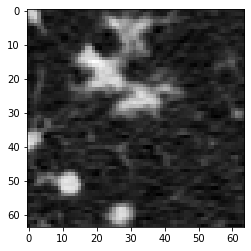

In [26]:
plt.imshow(ct_t[0][0:1].permute(1, 2, 0).numpy(), cmap='gray')

In [ ]:
segmentation_model=segmentation_model.to('cuda')

In [21]:
METRICS_SIZE=10
METRICS_LOSS_NDX = 1
METRICS_TP_NDX = 7
METRICS_FN_NDX = 8
METRICS_FP_NDX = 9

best_score = 0.0
train_scores=[]
valid_scores=[]
optimizer = torch.optim.Adam(segmentation_model.parameters())
early_stopping_count = 0
for epoch_ndx in range(1, N_EPOCHS+1):
    trnMetrics_t = doTraining(segmentation_model, optimizer, epoch_ndx, train_dl)
    #valMetrics_t = doValidation(segmentation_model, epoch_ndx, valid_dl)
    train_scores.append(logMetrics(epoch_ndx, 'train', trnMetrics_t))   
    score = logMetrics(epoch_ndx, 'val', valMetrics_t)
    #valid_scores.append(score) 
    if score <= best_score:
        early_stopping_count += 1
    best_score = max(score, best_score)
    if early_stopping_count==EARLY_STOPPING:
        break

loss: -4.48522: 100%|██████████| 9375/9375 [04:24<00:00, 35.51it/s]


NameError: name 'valid_dl' is not defined

### （a）指標のレポートをどう変えなければなりませんか。画像の出力はどうでしょうか。

### （b）結果はどうなりましたか。結果は、次の分類ステップを省略できる程の性能でしたか。

## [4] 64 × 64クロップ画像とスライス全体の両方を使って訓練ができますか

dsets.pyのgetitem_trainingCrop関数内でクロップとスライス全体がバッチごとに交互に選択されるようにします。\
（注釈[16]にあるように、バッチ内のサンプルは同じサイズである必要がありますが、バッチ間は必ずしも同じテンソルサイズでなくて大丈夫です）

## [5] LUNA（あるいはLIDC）意外に使えるデータを探してみてください

In [1]:
##省略